# Ensemble Learning
Ensemble learning is a powerful approach that leverages the combined intelligence of multiple models to enhance machine learning performance and accuracy. This technique has gained widespread adoption in recent years due to its ability to improve predictive capabilities while minimizing the risk of overfitting. In this article, we will delve into ensemble learning and demonstrate how to implement it using Python.

# Understanding Ensemble Learning
Traditional machine learning involves training a single model on a dataset to make predictions. However, no individual model can fully capture the complexity and variability of real-world data. Ensemble learning addresses this challenge by aggregating the predictions of multiple models, known as base models or weak learners.

The fundamental principle behind ensemble learning is the wisdom of the crowd—while individual models may produce errors, combining their predictions results in a more robust and accurate final output. By compensating for each other's weaknesses, these models collectively deliver improved performance.

# Libraries

# 1. Data Handling and Visualization Libraries
numpy (np): A fundamental package for numerical computing in Python, often used for handling arrays and performing mathematical operations.

pandas (pd): A data analysis library used for handling structured data (DataFrames), enabling data manipulation and cleaning.

matplotlib.pyplot (plt): A plotting library that provides tools for creating static, animated, and interactive visualizations.

seaborn (sns): A statistical data visualization library that builds on matplotlib and provides attractive, informative graphs.

# 2. Data Preprocessing and Splitting
train_test_split: A function from sklearn.model_selection that splits a dataset into training and testing sets to evaluate model performance.

# 3. Machine Learning Models
KNeighborsClassifier: Implements the k-Nearest Neighbors (k-NN) algorithm, a non-parametric method used for classification based on the nearest training samples.

LogisticRegression: A statistical model that applies logistic function to binary or multi-class classification problems.

DecisionTreeClassifier: A tree-based model that splits data based on feature conditions to classify instances.

SVC (Support Vector Classifier): Implements Support Vector Machines (SVM), which find the best hyperplane to separate data into different classes.

# 4. Ensemble Learning Methods
RandomForestClassifier: An ensemble learning method that creates multiple decision trees and combines their outputs to improve accuracy and reduce overfitting.

AdaBoostClassifier: An adaptive boosting algorithm that combines weak classifiers iteratively to improve model performance.

BaggingClassifier: Implements bootstrap aggregating (bagging), which trains multiple versions of a base model on different subsets of data and averages their predictions.

ExtraTreesClassifier: A variant of Random Forest that uses more randomness in selecting split points, improving robustness.

VotingClassifier: Combines multiple models by majority voting (for classification) or averaging predictions (for regression).

StackingClassifier: A method that stacks multiple models together and uses a meta-model to combine their predictions for better performance.

# 5. Performance Evaluation
accuracy_score: A function that computes the accuracy of classification models by comparing predicted and actual labels.


In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier , ExtraTreesClassifier, VotingClassifier ,StackingClassifier , AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

The command

df = pd.read_csv('Tshirt Dataset.csv')

loads a CSV file named "Tshirt Dataset.csv" into a Pandas DataFrame (df).

In [202]:
df=pd.read_excel('https://github.com/samariwa/artificial-intelligence-projects/raw/refs/heads/main/heart_dataset_complete.xlsx')

The df.head() function in Pandas displays the first five rows of the DataFrame (df) by default. It helps in quickly inspecting the structure and contents of the dataset.

In [203]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,2,130,204,0,2,202,0,0.0,2,0,2,0
1,34,1,1,118,182,0,2,174,0,0.0,2,0,2,0
2,34,0,2,118,210,0,0,192,0,0.7,2,0,2,0
3,35,0,4,138,183,0,0,182,0,1.4,2,0,2,0
4,35,1,4,120,198,0,0,130,1,1.6,1,0,3,1


In [204]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.399340,0.666667,2.333333,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.933790,0.584947,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [206]:
df.shape

(303, 14)

In [207]:
x = df.iloc[: , :-1].values
y = df.iloc[:,-1].values

# Breaking Down the Code: X_train, X_test, y_train, y_test

X_train → Training data (features)

X_test → Testing data (features)

y_train → Training labels (target variable)

y_test → Testing labels (target variable)

train_test_split(x, y, test_size=0.20)

x: Feature variables (independent variables).

y: Target variable (dependent variable).

test_size=0.20: 20% of the data will be used for testing, and 80% for training.



In [208]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

# Support Vector Machine (SVM) classifier


In [209]:
# build the model
svm = SVC()
svm.fit(X_train,y_train)

# make predictions
y_pred = svm.predict(X_test)

# get accuracy
accuracy_score(y_test,y_pred)

0.6721311475409836

# Voting Classifier

In [210]:
## Create many mode types
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()


## create a voting classifier
model_list = [('lr',lr),('dt',dt),('svm',svm), ('knn', knn)]

v = VotingClassifier(
    estimators = model_list ,
    n_jobs=-1
)


# train the voting classifier
v.fit(X_train,y_train)


# make predictions
y_pred = v.predict(X_test)


# get model accuracy
accuracy_score(y_test,y_pred)

0.7704918032786885

# Bagging Classifier

In [211]:
# bagging
bc = BaggingClassifier(
    estimator= dt ,  # Changed 'base_estimator' to 'estimator'
    n_estimators=9
)

# fit the classifier
bc.fit(X_train,y_train)


# make predictions
y_pred = bc.predict(X_test)


# get model accuracy
accuracy_score(y_test,y_pred)

0.8688524590163934

# Stacking Classifier

In [212]:
### Stacking
base_classifiers = [
    ('lr' , LogisticRegression()) ,
    ('knn',KNeighborsClassifier()),
    ('dt' , DecisionTreeClassifier()),
    ('svm' , SVC())
]


# create stacking classifier
sc = StackingClassifier(
        estimators=base_classifiers ,
    final_estimator= SVC()  ,
    cv=5
)


# fit the classifier
sc.fit(X_train,y_train)

# make predictions
y_pred = sc.predict(X_test)

# get model accuracy
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.819672131147541

# AdaBoost Classifier

In [213]:
# create adaboost classifier
adm = AdaBoostClassifier(n_estimators=10)

# fit the classifier
adm.fit(X_train,y_train)

# make predictions
y_pred = adm.predict(X_test)

# get model accuracy
accuracy_score(y_test,y_pred)

0.8852459016393442

# Manual Feature Selection

I will select the best features based on correlation of the features with the target variable. This shows its impact in predicting the target value. Values with a low correlation (values with correlation around 0) will be removed. Extremely positive and negative correlations have a role to play in prediction.

## Data correlation
View the correlation of data with the target for purposes of identifying feature importance

In [214]:
corr = df.corr()

<Axes: >

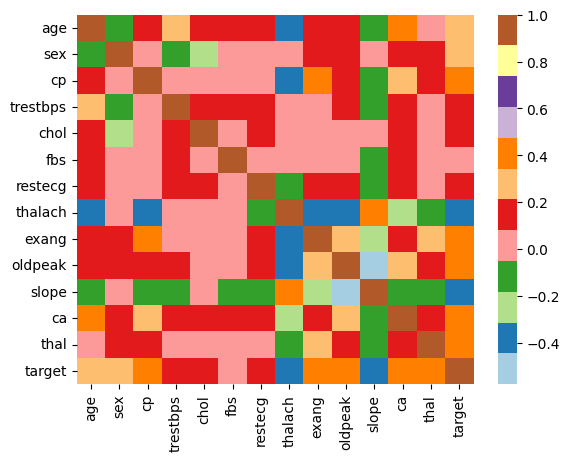

In [215]:
sns.heatmap(corr, cmap='Paired')

In [216]:
# reduce the columns that have a low correlation with the target
df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal', 'target']]
df

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,2,130,204,2,202,0,0.0,2,0,2,0
1,34,1,1,118,182,2,174,0,0.0,2,0,2,0
2,34,0,2,118,210,0,192,0,0.7,2,0,2,0
3,35,0,4,138,183,0,182,0,1.4,2,0,2,0
4,35,1,4,120,198,0,130,1,1.6,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71,0,3,110,265,2,130,0,0.0,2,1,2,0
299,71,0,4,112,149,0,125,0,1.6,1,0,2,0
300,74,0,2,120,269,2,121,1,0.2,2,1,2,0
301,76,0,3,140,197,1,116,0,1.1,1,0,2,0


In [217]:
df.shape

(303, 13)

In [218]:
x = df.iloc[: , :-1].values
y = df.iloc[:,-1].values

In [219]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

# SVC

In [220]:
# build the model
svm = SVC()
svm.fit(X_train,y_train)

# make predictions
y_pred = svm.predict(X_test)

# get accuracy
accuracy_score(y_test,y_pred)

0.6557377049180327

# Voting Classifier

In [221]:
## Create many mode types
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()


## create a voting classifier
model_list = [('lr',lr),('dt',dt),('svm',svm), ('knn', knn)]

v = VotingClassifier(
    estimators = model_list ,
    n_jobs=-1
)


# train the voting classifier
v.fit(X_train,y_train)


# make predictions
y_pred = v.predict(X_test)


# get model accuracy
accuracy_score(y_test,y_pred)

0.7868852459016393

# Bagging Classifier

In [222]:
# bagging
bc = BaggingClassifier(
    estimator= dt ,  # Changed 'base_estimator' to 'estimator'
    n_estimators=9
)

# fit the classifier
bc.fit(X_train,y_train)


# make predictions
y_pred = bc.predict(X_test)


# get model accuracy
accuracy_score(y_test,y_pred)

0.8360655737704918

# Stacking Classifier

In [234]:
### Stacking
base_classifiers = [
    ('lr' , LogisticRegression()) ,
    ('knn',KNeighborsClassifier()),
    ('dt' , DecisionTreeClassifier()),
    ('svm' , SVC())
]


# create stacking classifier
sc = StackingClassifier(
        estimators=base_classifiers ,
    final_estimator= SVC()  ,
    cv=5
)


# fit the classifier
sc.fit(X_train,y_train)

# make predictions
y_pred = sc.predict(X_test)

# get model accuracy
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.819672131147541

# AdaBoost Classifier

In [224]:
# create adaboost classifier
adm = AdaBoostClassifier(n_estimators=10)

# fit the classifier
adm.fit(X_train,y_train)

# make predictions
y_pred = adm.predict(X_test)

# get model accuracy
accuracy_score(y_test,y_pred)

0.8688524590163934

The manual feature selection method using correlation resulted in better model performance but to a small degree. I would like to try using Scikit-learns `SelectKBest()` method of the feature_selection module to get the best features and compare performance.

# Automatic Feature Selection

 I am trying to revert my data back to the original one so that I use Scikit-learns method of feature selection and compare in to the manual selection above that I did using the data correlation. Want to see the impact on model performance.

In [225]:
df=pd.read_excel('https://github.com/samariwa/artificial-intelligence-projects/raw/refs/heads/main/heart_dataset_complete.xlsx')

In [226]:
x = df.iloc[: , :-1].values
y = df.iloc[:,-1].values

In [227]:
x.shape

(303, 13)

In [228]:
x_new = SelectKBest(f_classif, k=10).fit_transform(x, y)

In [229]:
x_new.shape

(303, 10)

In [230]:
X_train , X_test , y_train , y_test = train_test_split(x_new,y,test_size=.20)

In [231]:
# build the model
svm = SVC()
svm.fit(X_train,y_train)

# make predictions
y_pred = svm.predict(X_test)

# get accuracy
accuracy_score(y_test,y_pred)

0.7049180327868853

In [232]:
## Create many mode types
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()


## create a voting classifier
model_list = [('lr',lr),('dt',dt),('svm',svm), ('knn', knn)]

v = VotingClassifier(
    estimators = model_list ,
    n_jobs=-1
)


# train the voting classifier
v.fit(X_train,y_train)


# make predictions
y_pred = v.predict(X_test)


# get model accuracy
accuracy_score(y_test,y_pred)

0.7868852459016393

In [233]:
# bagging
bc = BaggingClassifier(
    estimator= dt ,  # Changed 'base_estimator' to 'estimator'
    n_estimators=9
)

# fit the classifier
bc.fit(X_train,y_train)


# make predictions
y_pred = bc.predict(X_test)


# get model accuracy
accuracy_score(y_test,y_pred)

0.8524590163934426

In [235]:
### Stacking
base_classifiers = [
    ('lr' , LogisticRegression()) ,
    ('knn',KNeighborsClassifier()),
    ('dt' , DecisionTreeClassifier()),
    ('svm' , SVC())
]


# create stacking classifier
sc = StackingClassifier(
        estimators=base_classifiers ,
    final_estimator= SVC()  ,
    cv=5
)


# fit the classifier
sc.fit(X_train,y_train)

# make predictions
y_pred = sc.predict(X_test)

# get model accuracy
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8524590163934426

In [236]:
# create adaboost classifier
adm = AdaBoostClassifier(n_estimators=10)

# fit the classifier
adm.fit(X_train,y_train)

# make predictions
y_pred = adm.predict(X_test)

# get model accuracy
accuracy_score(y_test,y_pred)

0.8852459016393442

This method of feature extraction yields better results than manual feature selection. However, the differences were slight and this is because of the relatively small dataset that was being used in running this experiment. A larger dataset should be used to train for better results.